# Imports

In [2]:
from numpy.random import seed
seed(888)

from tensorflow import random
random.set_seed(404)

In [141]:
import os
import numpy as np
import tensorflow as tf
#from tensorflow import keras
import itertools

from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Activation, Dropout

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [5]:
LOG_DIR = "tensorboard_cifar_logs/"

LABEL_NAMES = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT * IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [7]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Explore the Data

In [9]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

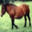

In [10]:
pic = array_to_img(x_train_all[7])
display(pic)

In [11]:
y_train_all.shape

(50000, 1)

In [12]:
y_train_all[7][0]  # Label

7

In [13]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

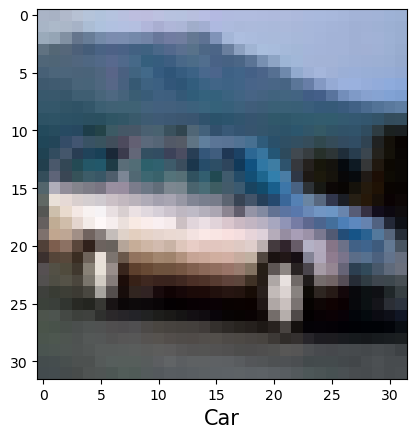

In [14]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

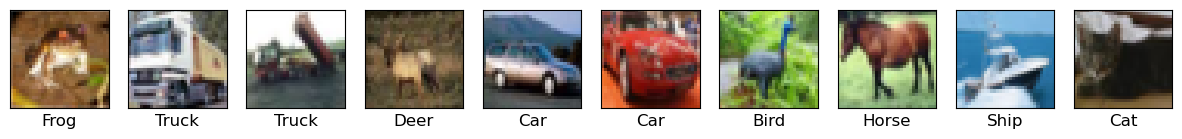

In [15]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=12)
    plt.yticks([])
    plt.xticks([])

In [16]:
x_train_all[0].shape

(32, 32, 3)

In [17]:
nr_images, x, y, c = x_train_all.shape
print(f"images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}")

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [18]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [20]:
x_train_all[0][0][0]  # Pixel value

array([59, 62, 63], dtype=uint8)

In [21]:
type(x_train_all[0][0][0][0]) #  uint8 format (unsigned integer = positive number)

numpy.uint8

In [22]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 # All values will be a float between 0 and 1 (RGB goes from 0 to 255)
type(x_train_all[0][0][0][0])

numpy.float64

In [23]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [24]:
x_train_all.shape

(50000, 3072)

In [25]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

In [26]:
x_test.shape

(10000, 3072)

## Create Validation Dataset (60-20-20 split)

In [28]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

In [29]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

### Create a small dataset (for illustration)

In [31]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Network Using Keras

In [33]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation="relu", name="m1_hidden1"),
    Dense(units=64, activation="relu", name="m1_hidden2"),
    Dense(units=16, activation="relu", name="m1_hidden3"),
    Dense(units=10, activation="softmax", name="m1_output")
])

model_1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

C:\Users\filip\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(units=128, input_dim=TOTAL_INPUTS, activation="relu", name="m2_hidden1"))
model_2.add(Dense(units=64, activation="relu", name="m2_hidden2"))
model_2.add(Dense(units=16, activation="relu", name="m2_hidden3"))
model_2.add(Dense(units=10, activation="softmax", name="m2_output"))

model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

C:\Users\filip\anaconda3\Lib\site-packages\keras\src\layers\regularization\dropout.py:42: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(units=128, input_dim=TOTAL_INPUTS, activation="relu", name="m3_hidden1"))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(units=64, activation="relu", name="m3_hidden2"))
model_3.add(Dense(units=16, activation="relu", name="m3_hidden3"))
model_3.add(Dense(units=10, activation="softmax", name="m3_output"))

model_3.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [36]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ m1_hidden1 (Dense)                   │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ m1_hidden2 (Dense)                   │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ m1_hidden3 (Dense)                   │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ m1_output (Dense)                    │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,810 (1.54 MB)

 Trainable params: 402,810 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

# Tensorboard (visualizing learning)

In [38]:
def get_tensorboard(model_name):
    folder_name = f"{model_name} at {strftime('%H%M')}"
    dir_paths = os.path.join(LOG_DIR, folder_name)
    
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print("Successfully created directory")
    
    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [40]:
samples_per_batch = 1000

In [41]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, 
#             callbacks=[get_tensorboard("Model 1")], verbose=0, validation_data=(x_val, y_val))

In [42]:
# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch, epochs=nr_epochs, 
#             callbacks=[get_tensorboard("Model 2")], verbose=0, validation_data=(x_val, y_val))

In [43]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard("Model 1 XL")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 4min
Wall time: 1min 1s


In [44]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard("Model 2 XL")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 7min 15s
Wall time: 1min 34s


In [45]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch, epochs=nr_epochs, 
            callbacks=[get_tensorboard("Model 3 XL")], verbose=0, validation_data=(x_val, y_val))

Successfully created directory
CPU times: total: 8min
Wall time: 1min 50s


# Predictions on Individual Images

In [83]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [87]:
np.set_printoptions(precision=3)

In [89]:
model_2.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.08 , 0.009, 0.044, 0.161, 0.149, 0.065, 0.356, 0.133, 0.001,
        0.003]], dtype=float32)

In [93]:
model_2.predict(x_val).shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step


(10000, 10)

In [97]:
np.argmax(model_2.predict(test), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([6], dtype=int64)

In [99]:
y_val[0]

array([6], dtype=uint8)

In [101]:
for i in range(10):
    predicted_val = np.argmax(model_2.predict(np.expand_dims(x_val[i], axis=0)), axis=1)[0]
    actual_val = y_val[i][0]
    print(f"Predicted value for image {i}: {predicted_val}; Actual value: {actual_val}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted value for image 0: 6; Actual value: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted value for image 1: 1; Actual value: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted value for image 2: 9; Actual value: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted value for image 3: 6; Actual value: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted value for image 4: 8; Actual value: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted value for image 5: 6; Actual value: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted value for image 6: 6; Actual value: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted value for image 7: 7; Actual value: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted value for image 8: 8; Actual value: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted value for image 9: 4; Actual value: 3


# Evaluation

In [104]:
model_2.metrics_names

['loss', 'compile_metrics']

In [110]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:0.3}; Test accuracy: {test_accuracy:0.1%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.4977 - loss: 1.4275
Test loss: 1.43; Test accuracy: 49.5%


### Confusion Matrix

In [115]:
predictions = np.argmax(model_2.predict(x_test), axis=1)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


In [117]:
conf_matrix.shape

(10, 10)

In [119]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [121]:
conf_matrix.max()

640

In [123]:
conf_matrix.min()

5

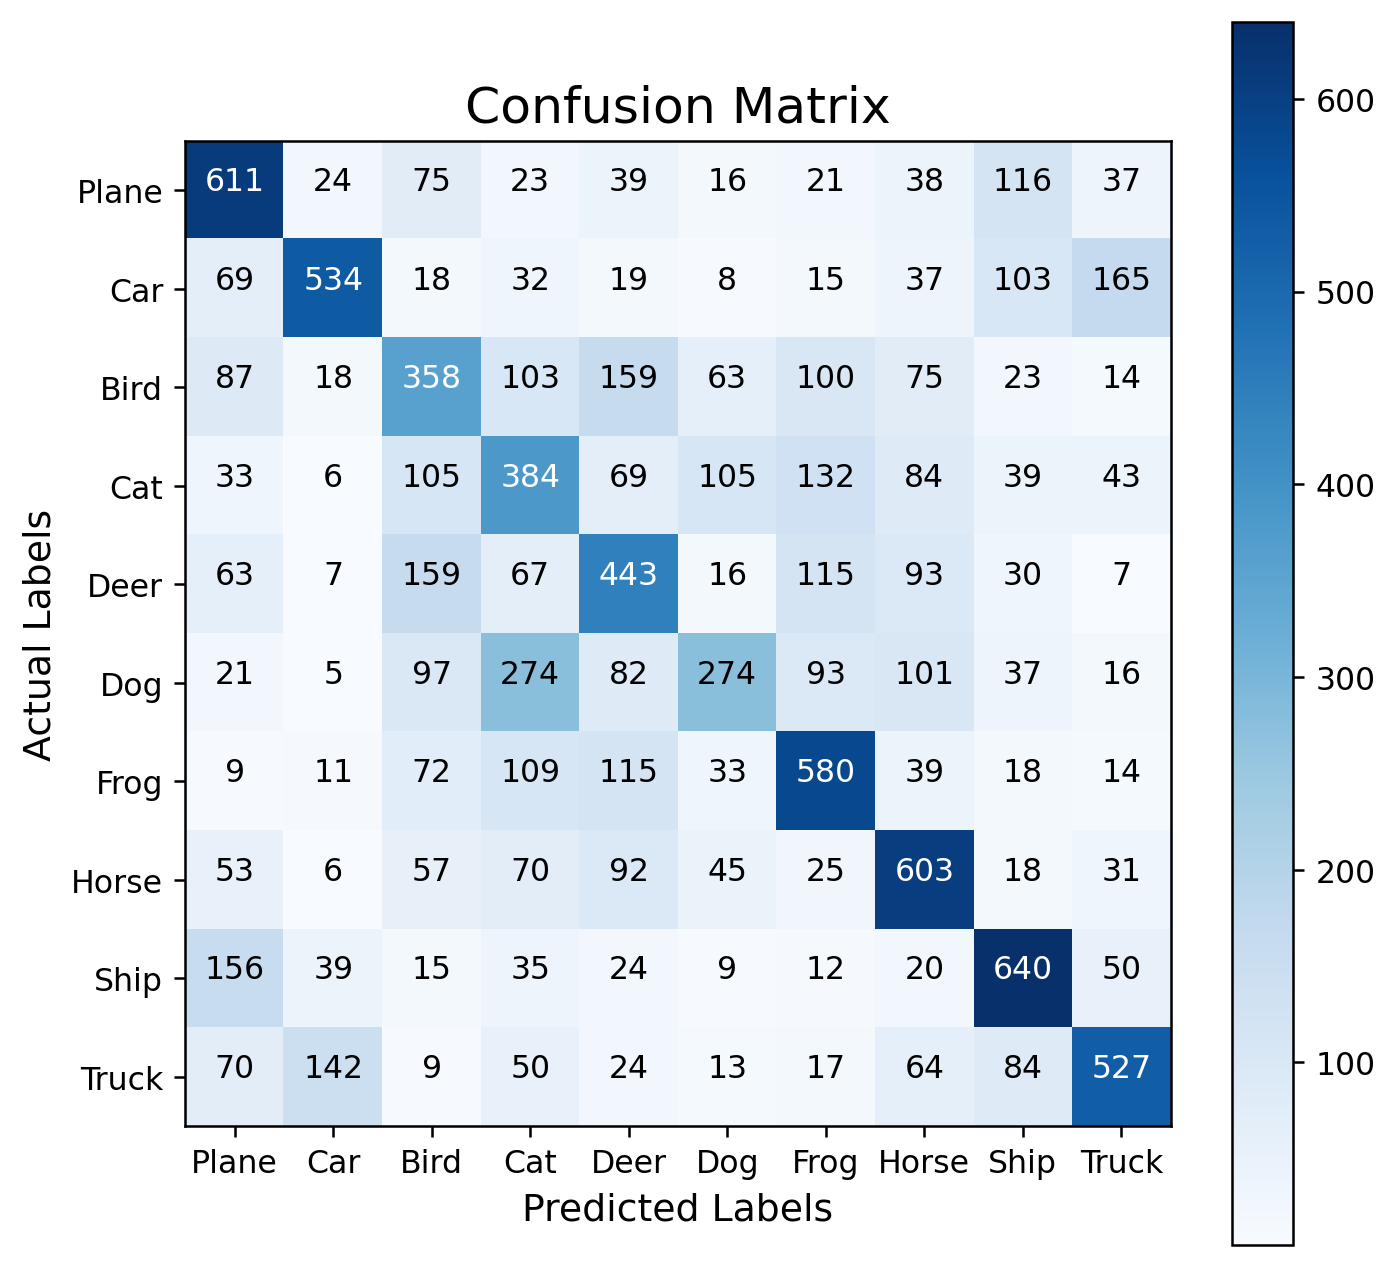

In [151]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Blues)

plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Actual Labels", fontsize=12)
plt.xlabel("Predicted Labels", fontsize=12)

tick_marks = np.arange(len(LABEL_NAMES))
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i, j], horizontalalignment="center", 
             color="white" if conf_matrix[i, j] > conf_matrix.max()/2 else "black")

plt.show()

In [153]:
# True Positives (along the diagonal)
np.diag(conf_matrix)

array([611, 534, 358, 384, 443, 274, 580, 603, 640, 527], dtype=int64)

In [157]:
# False negatives (along the rows)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.611, 0.534, 0.358, 0.384, 0.443, 0.274, 0.58 , 0.603, 0.64 ,
       0.527])

In [159]:
# False Positives (along the columns)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.521, 0.674, 0.371, 0.335, 0.416, 0.471, 0.523, 0.523, 0.578,
       0.583])

In [163]:
avg_recall = np.mean(recall)
avg_precision = np.mean(precision)
print(f"Model 2 recall score: {avg_recall:.2%}")
print(f"Model 2 precision: {avg_precision:.2%}")

Model 2 recall score: 49.54%
Model 2 precision: 49.93%


In [171]:
f_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f"Model 2 f-score: {f_score:.2%}")

Model 2 f-score: 49.74%
